<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/04_Selection_model/02_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To install scikit-learn library use command below Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install scikit-learn**

In order to update to newest scikit-learn library, use command below

Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install --upgrade scikit-learn**

### Contest:
1. [Import library](#0)
2. [Data generate](#1)
3. [Visualition data](#2)
4. [Divide into traning and testing set](#3)
5. [Visualition traning and test set](#4)
6. [Model built](#5)
7. [Cross-validation](#8)





### Metryki - Problem klasyfikacji:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Podział na zbiór treningowy i testowy](#3)
5. [Wizualizacja zbioru treningowego i testowego](#4)
6. [Budowa modelu](#5)
7. [Walidacja krzyżowa](#8)



### <a name='1'></a> Import library / Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

### <a name='1'></a> Generate data / Import bibliotek

In [3]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data=raw_data[0]
target= raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[-0.15995017  1.03638621]
 [ 1.13114102 -0.58763612]
 [ 0.16966619  0.09420938]
 [ 0.51772753  0.81518706]
 [-0.68002085  0.15563468]]

[0 1 1 0 0]


In [4]:
df=pd.DataFrame(data=np.c_[data, target], columns=['x1','x2', 'target'])
df.head()

,x1,x2,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


### <a name='2'></a> Wizualizacja danych / Data visualisation

In [5]:
px.scatter(df, x='x1', y='x2', color='target', width=700, height=400)

### <a name='3'></a> Podział na zbiór treningowy i testowy / Devide into training and testing set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 2)
X_test shape: (175, 2)
y_train shape: (525,)
y_test shape: (175,)


### <a name='4'></a> Wizualizacja zbioru treningowego i testowego / Visualisation  training and testing set

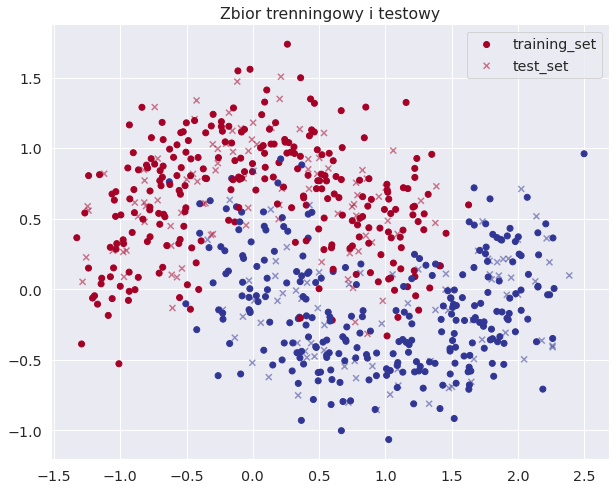

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbior trenningowy i testowy')
plt.legend()
plt.show()

### <a name='5'></a> Budowa modelu / Model build

TypeError: ignored

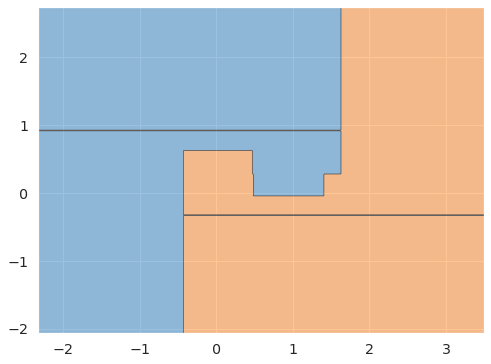

In [11]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

classifier=DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'Zbiór treningowy: dokładność {classifier.score(X_train, y_train):.4f}')
plt.show()

TypeError: ignored

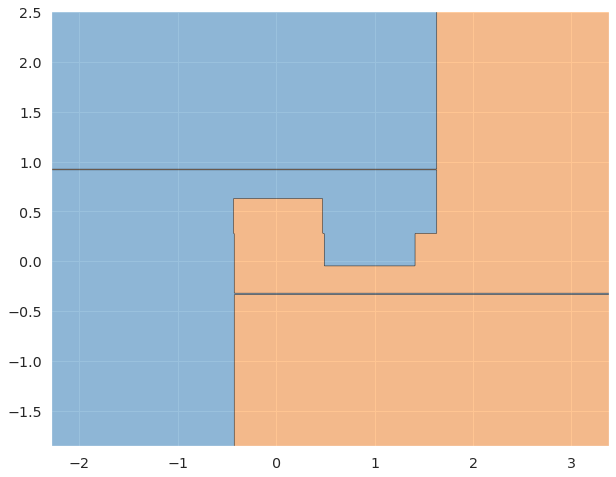

In [12]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'Zbiór testowy: dokładność {classifier.score(X_test, y_test):.4f}')
plt.show()

### <a name='8'></a>Walidacja krzyżowa /  Cross validation

In [18]:
from sklearn.model_selection import cross_val_score

classifier=DecisionTreeClassifier(max_depth=5, min_samples_split=5)
scores=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [19]:
print(f"Accurancy:{scores.mean():.4f} (+/- {scores.std():.4f})")

Accurancy:0.9200 (+/- 0.0359)


In [20]:
classifier=DecisionTreeClassifier(max_depth=5, min_samples_split=5)
scores=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=15)
scores

array([0.85714286, 0.85714286, 0.91428571, 0.97142857, 0.91428571,
       0.91428571, 0.97142857, 0.91428571, 0.91428571, 0.97142857,
       0.88571429, 0.97142857, 0.94285714, 0.85714286, 0.85714286])

In [21]:
print(f"Accurancy:{scores.mean():.4f} (+/- {scores.std():.4f})")

Accurancy:0.9143 (+/- 0.0430)


In [22]:
scores=pd.DataFrame(scores, columns=['accurancy'])
scores

,accurancy
0,0.857143
1,0.857143
2,0.914286
3,0.971429
4,0.914286
5,0.914286
6,0.971429
7,0.914286
8,0.914286
9,0.971429


In [23]:
px.bar(scores, y='accurancy', color='accurancy', width=700, height=400, title=f'Walidacja krzyzowa( 15 podziałów) | Accurancy:{scores.mean()[0]:.4f}(+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])